In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000)

In [2]:
#Importing datasets
df_covid = pd.read_csv("data/covid_19_clean_complete.csv")
df_country = pd.read_csv("data/country_wise_latest.csv")
df_day = pd.read_csv("data/day_wise.csv")
df_f_group = pd.read_csv("data/full_grouped.csv")
df_world = pd.read_csv("data/worldometer_data.csv")

In [16]:
all_dfs = [df_covid, df_country, df_day, df_f_group, df_world]
for df in all_dfs:
    print(f'{df.head()}')

  Province/State Country/Region       Lat       Long        Date  Confirmed  Deaths  Recovered  Active             WHO Region
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0       0          0       0  Eastern Mediterranean
1            NaN        Albania  41.15330  20.168300  2020-01-22          0       0          0       0                 Europe
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0       0          0       0                 Africa
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0       0          0       0                 Europe
4            NaN         Angola -11.20270  17.873900  2020-01-22          0       0          0       0                 Africa
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  Confirmed last week  1 week change  1 week % increase             WHO Region
0    A

In [ ]:
#df_covid.columns.tolist()

In [ ]:
df_covid['Province/State'] = df_covid['Province/State'].fillna('')

In [17]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [22]:
#replace Province/State data if empty string with NaN
df_covid['Province/State'] = df_covid['Province/State'].replace('', np.nan)

In [23]:
df_covid.head(40)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


### Pre-processing

In [4]:
## Inspecting the shape 
df_covid.shape

(49068, 10)

In [5]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df_covid.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [7]:
df_covid.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

**Checking missing values & handling them**

In [10]:
df_f_group.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [9]:
df_covid['Province/State'] = df_covid['Province/State'].fillna('')
df_covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
df_world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [15]:
df_world.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [16]:
# handling all numerical missing values by filling them with 0
happening = ['NewCases','NewDeaths','NewRecovered','Serious,Critical','TotalDeaths','Tests/1M pop','Deaths/1M pop', 'TotalTests','ActiveCases','TotalRecovered']
df_world[happening] = df_world[happening].fillna(0)
#handling the region names missing values by filling them with ''
df_world['WHO Region'] = df_world['WHO Region'].fillna('')
df_world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [17]:
df_world.isnull().sum()

Country/Region      0
Continent           1
Population          1
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    1
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [18]:
df_f_group.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [19]:
# changing the format of date
df_f_group["Date"] = pd.to_datetime(df_f_group["Date"], format = "%Y-%m-%d")
print(df_f_group.info())
df_day["Date"] = pd.to_datetime(df_day["Date"], format= "%Y-%m-%d")
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                 

**Checking the duplicates**

In [20]:
df_covid.duplicated().sum()

0

In [21]:
df_country.duplicated().sum()

0

In [22]:
df_day.duplicated().sum()

0

In [24]:
df_f_group.duplicated().sum()

0

In [25]:
df_world.duplicated().sum()

0

## Step:3) Merging the data for data integrity

In [28]:
#finding the common columns in between the two datasets that we'd be analysing
covid_columns = set(df_covid.columns)
print(covid_columns)
country_columns = set(df_country.columns)
print(country_columns)
common_columns = covid_columns & country_columns
print(common_columns)

{'WHO Region', 'Recovered', 'Lat', 'Deaths', 'Country/Region', 'Long', 'Confirmed', 'Date', 'Active', 'Province/State'}
{'1 week change', '1 week % increase', 'Confirmed last week', 'WHO Region', 'Deaths / 100 Recovered', 'Recovered', 'Deaths', 'Country/Region', 'New recovered', 'Recovered / 100 Cases', 'Active', 'Deaths / 100 Cases', 'New deaths', 'Confirmed', 'New cases'}
{'WHO Region', 'Recovered', 'Deaths', 'Country/Region', 'Active', 'Confirmed'}


In [29]:
commons = ['WHO Region', 'Recovered', 'Country/Region', 'Deaths', 'Active', 'Confirmed']
merged_cov_country = pd.merge(df_covid, df_country, on=commons, how='inner')
merged_cov_country.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,,Timor-Leste,-8.874217,125.727539,2020-04-24,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
1,,Timor-Leste,-8.874217,125.727539,2020-04-25,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
2,,Timor-Leste,-8.874217,125.727539,2020-04-26,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
3,,Timor-Leste,-8.874217,125.727539,2020-04-27,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
4,,Timor-Leste,-8.874217,125.727539,2020-04-28,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0


**Checking outliers for the merged dataframe**

C:\Users\ABS RAKIB\AppData\Local\Temp\ipykernel_2548\264553441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_cov_country[all_cases], orient='h', palette='Set2', color = 'r',saturation=1.75)


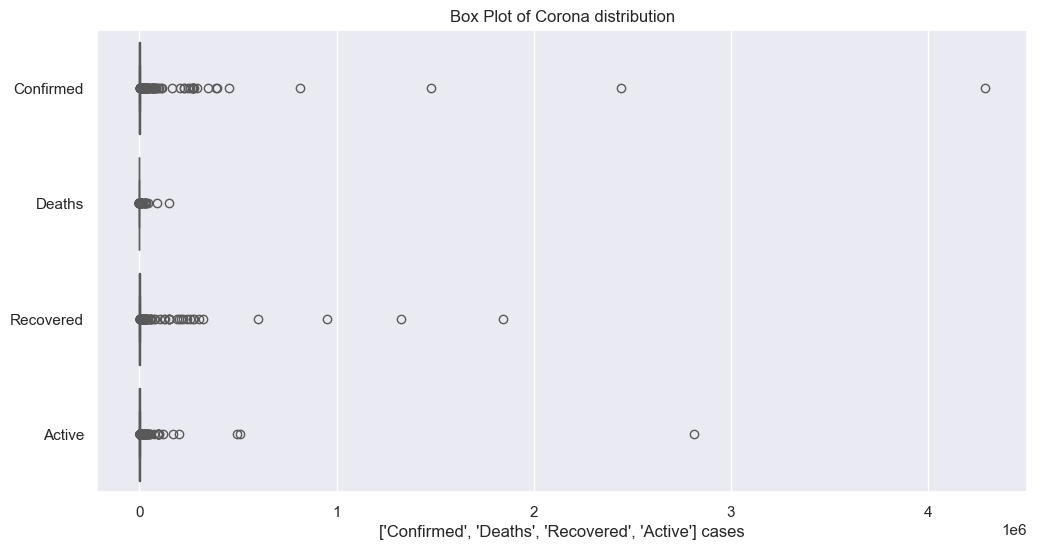

In [31]:
# Plotting box plot for Confirmed
sns.set(style="darkgrid")  
all_cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
# Create a box plot for every cases
plt.figure(figsize=(12, 6))  
sns.boxplot(data=merged_cov_country[all_cases], orient='h', palette='Set2', color = 'r',saturation=1.75)


# Add labels and title (optional)
plt.xlabel(f'{all_cases} cases')
plt.title('Box Plot of Corona distribution')

# Show the plot
plt.show()

## Step:4) Checking our target through fizzes

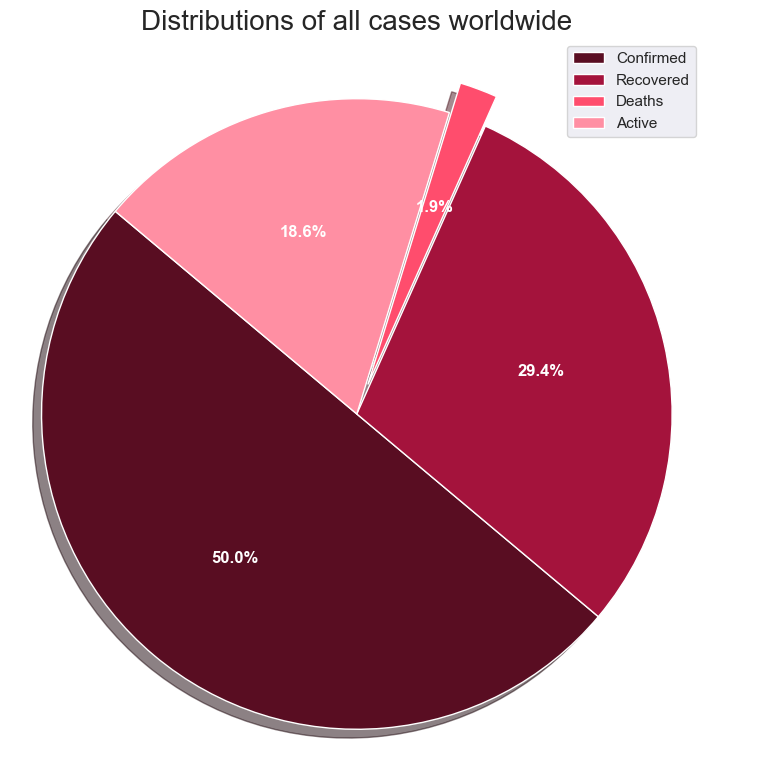

In [39]:
df_intotalcases = merged_cov_country[['Confirmed','Recovered', 'Deaths', 'Active']].sum()
label = ['Confirmed','Recovered', 'Deaths', 'Active']
color_scale = ['#590d22','#a4133c','#ff4d6d','#ff8fa3']

plt.figure(figsize = (8,8))
plt.pie(df_intotalcases, labels = label, autopct = '%1.1f%%', explode = (0,0,0.1,0) ,colors = color_scale, startangle = 140, shadow = True, textprops={'color': 'white','weight': 'bold'})
plt.title("Distributions of all cases worldwide", fontsize = 20)

plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()